In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Features 

* Price: The price of the house.

* Area: The total area of the house in square feet.

* Bedrooms: The number of bedrooms in the house.

* Bathrooms: The number of bathrooms in the house.

* Stories: The number of stories in the house.

* Mainroad: Whether the house is connected to the main road (Yes/No).

* Guestroom: Whether the house has a guest room (Yes/No).

* Basement: Whether the house has a basement (Yes/No).

* Hot water heating: Whether the house has a hot water heating system (Yes/No).

* Airconditioning: Whether the house has an air conditioning system (Yes/No).

* Parking: The number of parking spaces available within the house.

* Prefarea: Whether the house is located in a preferred area (Yes/No).

* Furnishing status: The furnishing status of the house (Fully Furnished, Semi-Furnished, Unfurnished).

* House Age: the house age

# 1 Exploration des données (EDA)

## 1.1 Importation des données

In [2]:
df = pd.read_csv('data/house_prices.csv')
df.head()

,price,AreA,bedrooms,BATHROOMS,stories,mainroad,guestroom,basement,hotwaterheating,air conditioning,parking,prefarea,furnishing STATUS,houSeaGe
0,4543000.0,4990.0,4.0,2.0,2.0,yes,yes,yes,no,no,0.0,yes,furnished,15.0
1,8080940.0,7000.0,3.0,2.0,4.0,yes,no,no,no,yes,2.0,no,FURNISHED,11.0
2,8750000.0,4321.0,3.0,2.0,2.0,yes,no,yes,yes,no,2.0,no,FURNISHED,NaN
3,1890000.0,1700.0,3.0,1.0,2.0,yes,no,no,no,no,0.0,no,unfurnished,NaN
4,12215000.0,7500.0,4.0,2.0,2.0,yes,no,yes,no,yes,3.0,yes,furnished,NaN


## 1.2 Nettoyage des données

### 1.2.1 Formatage des données

In [3]:
def formatage_donnee(data):
    """
    Description
    Cette fonction change le nommage des colonnes (minuscule,
    sans espace, lié avec underscore). Rendre unique des valeurs écrites différemment.
    
    Parameters
    ----------
    data: A DataFrame
    Returns: 
    ----------
    A cleaned DataFrame
    """
    # Writing the columns names in lowercase, and replacing any space in the names with _
    data = data.rename(columns=lambda x: x.lower().replace(' ', '_'))
    
    # Making unique values that have been written diffrentely 
    for col in data.columns:
        if data[col].dtype == 'object':
            data[col] = data[col].str.lower()
    
            
    return data   

df = formatage_donnee(df)             

In [4]:
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,air_conditioning,parking,prefarea,furnishing_status,houseage
0,4543000.0,4990.0,4.0,2.0,2.0,yes,yes,yes,no,no,0.0,yes,furnished,15.0
1,8080940.0,7000.0,3.0,2.0,4.0,yes,no,no,no,yes,2.0,no,furnished,11.0
2,8750000.0,4321.0,3.0,2.0,2.0,yes,no,yes,yes,no,2.0,no,furnished,NaN
3,1890000.0,1700.0,3.0,1.0,2.0,yes,no,no,no,no,0.0,no,unfurnished,NaN
4,12215000.0,7500.0,4.0,2.0,2.0,yes,no,yes,no,yes,3.0,yes,furnished,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
804,2653000.0,4000.0,3.0,1.0,2.0,yes,no,no,no,yes,0.0,no,unfurnished,NaN
805,8855000.0,6421.0,3.0,3.0,2.0,yes,no,no,no,yes,1.0,yes,semi-furnished,NaN
806,3010000.0,3750.0,3.0,1.0,2.0,yes,no,no,no,no,0.0,no,unfurnished,NaN
807,4340000.0,1905.0,5.0,1.0,2.0,no,no,yes,no,no,0.0,no,semi-furnished,NaN


### 1.2.2 Valeurs manquantes


In [5]:
# Affichage du nombre de valeurs manquante
df.isnull().sum(axis = 0) 

price                 20
area                  15
bedrooms              24
bathrooms             21
stories               15
mainroad              16
guestroom             23
basement              22
hotwaterheating       18
air_conditioning      15
parking               16
prefarea              14
furnishing_status     23
houseage             804
dtype: int64

In [6]:
# We notice that houseage column has 804 missing value out of 806, so we remove this column
df = df.drop('houseage', axis=1)

In [7]:
df.dropna(subset=['price'], inplace=True)

In [8]:
df.isnull().sum()

price                 0
area                 13
bedrooms             21
bathrooms            19
stories              15
mainroad             14
guestroom            20
basement             21
hotwaterheating      17
air_conditioning     13
parking              16
prefarea             13
furnishing_status    20
dtype: int64

In [9]:
df.dtypes

price                float64
area                 float64
bedrooms             float64
bathrooms            float64
stories              float64
mainroad              object
guestroom             object
basement              object
hotwaterheating       object
air_conditioning      object
parking              float64
prefarea              object
furnishing_status     object
dtype: object

## 1.3 Visualisation des données

In [10]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,air_conditioning,parking,prefarea,furnishing_status
0,4543000.0,4990.0,4.0,2.0,2.0,yes,yes,yes,no,no,0.0,yes,furnished
1,8080940.0,7000.0,3.0,2.0,4.0,yes,no,no,no,yes,2.0,no,furnished
2,8750000.0,4321.0,3.0,2.0,2.0,yes,no,yes,yes,no,2.0,no,furnished
3,1890000.0,1700.0,3.0,1.0,2.0,yes,no,no,no,no,0.0,no,unfurnished
4,12215000.0,7500.0,4.0,2.0,2.0,yes,no,yes,no,yes,3.0,yes,furnished


### 1.3.1 Etude univariée

In [11]:
def etude_univarie(data):
    """
    Description
    Cette fonction affiche la répartition de chaque variable
    data: A DataFrame
    Returns: 
    ----------
    Graphique avec des figures
    """
    colonne_quanti = data.select_dtypes("float").columns
    colonne_quali = data.select_dtypes("object").columns
    
    fig, axes = plt.subplots(nrows=3, ncols=len(colonne_quanti), figsize=(15, 6))

    # Parcourez chaque colonne quantitative et affichez son histogramme
    for i, col in enumerate(colonne_quanti):
        sns.histplot(data[col].to_numpy(), kde=True, ax=axes[0, i], color="blue", bins=30)
        axes[0, i].set_xlabel(col)
        axes[0, i].set_ylabel('Fréquence')
    
    # Parcourez chaque colonne qualitative et affichez un diagramme en secteurs (pie chart)
    for i, col in enumerate(colonne_quali):
        counts = data[col].value_counts()
        if i < len(colonne_quali) and i < 6:
            row = 1
        else:
            row = 2
            i -= 6  # Réduisez l'indice pour accéder correctement aux colonnes qualitatives dans la deuxième ligne
        axes[row, i].pie(counts, labels=counts.index, autopct='%1.1f%%')
        axes[row, i].set_xlabel(col)
        axes[row, i].set_ylabel('')
    for i in range(1,6):
        axes[2,i].axis('off')    

    # Ajustez la mise en page pour éviter les chevauchements d'étiquettes
    plt.tight_layout()
    # Affichez la figure
    fig.suptitle("Figure Title")
    plt.show()
    

   

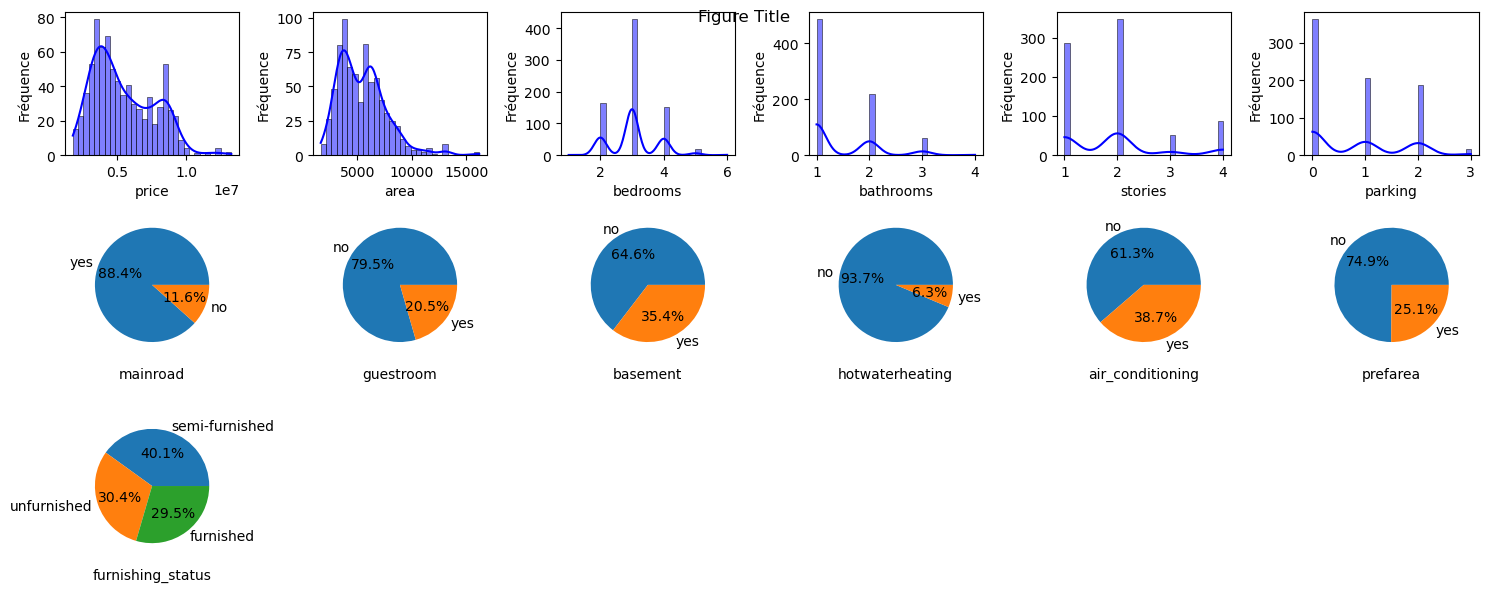

In [12]:
etude_univarie(df)

### 1.3.2 Etude multivariée

In [13]:
def etude_multivarie(data):
    """
    Description:
    Cette fonction affiche la matrice de corrélation entre les variables quantitatives,
    ainsi que la répartitions des données entre deux variables
    
    Parameters
    ----------
    data: pandas.DataFrame.
    
    Returns: 
    ----------
    Nonetype.
    """
    colonne_quanti = data.select_dtypes("float").columns
    fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(12, 12))
    axes_flat = axes.flatten()
    # Parcourez chaque colonne quantitative et affichez son relation avec le prix 
    for i, col in enumerate(colonne_quanti):
        if col != 'price':
            if col == 'area':
                sns.regplot(x=col, y='price', data=df, line_kws={"color": 'red'}, ax=axes_flat[i-1])
                axes_flat[i-1].set_xlabel(col)
                axes_flat[i-1].set_ylabel('Price')
            else:    
                sns.histplot(x=col, y='price', data=df, line_kws={"color": 'red'}, ax=axes_flat[i-1], cmap='coolwarm',cbar=True)
                axes_flat[i-1].set_xlabel(col)
                axes_flat[i-1].set_ylabel('Price')
            
    sns.heatmap(data.corr(), annot=True, cmap='coolwarm', ax = axes_flat[5])   

    colonne_quali = data.select_dtypes('object').columns
    for i, col in enumerate(colonne_quali):
        sns.histplot(x=col, y='price', data=df, line_kws={"color": 'red'}, ax=axes_flat[5+i], cmap='coolwarm',cbar=True)
        axes_flat[5+i].set_xlabel(col)
        axes_flat[5+i].set_ylabel('Price')     
    
    
    plt.tight_layout()
    # Affichez la figure
    plt.show()

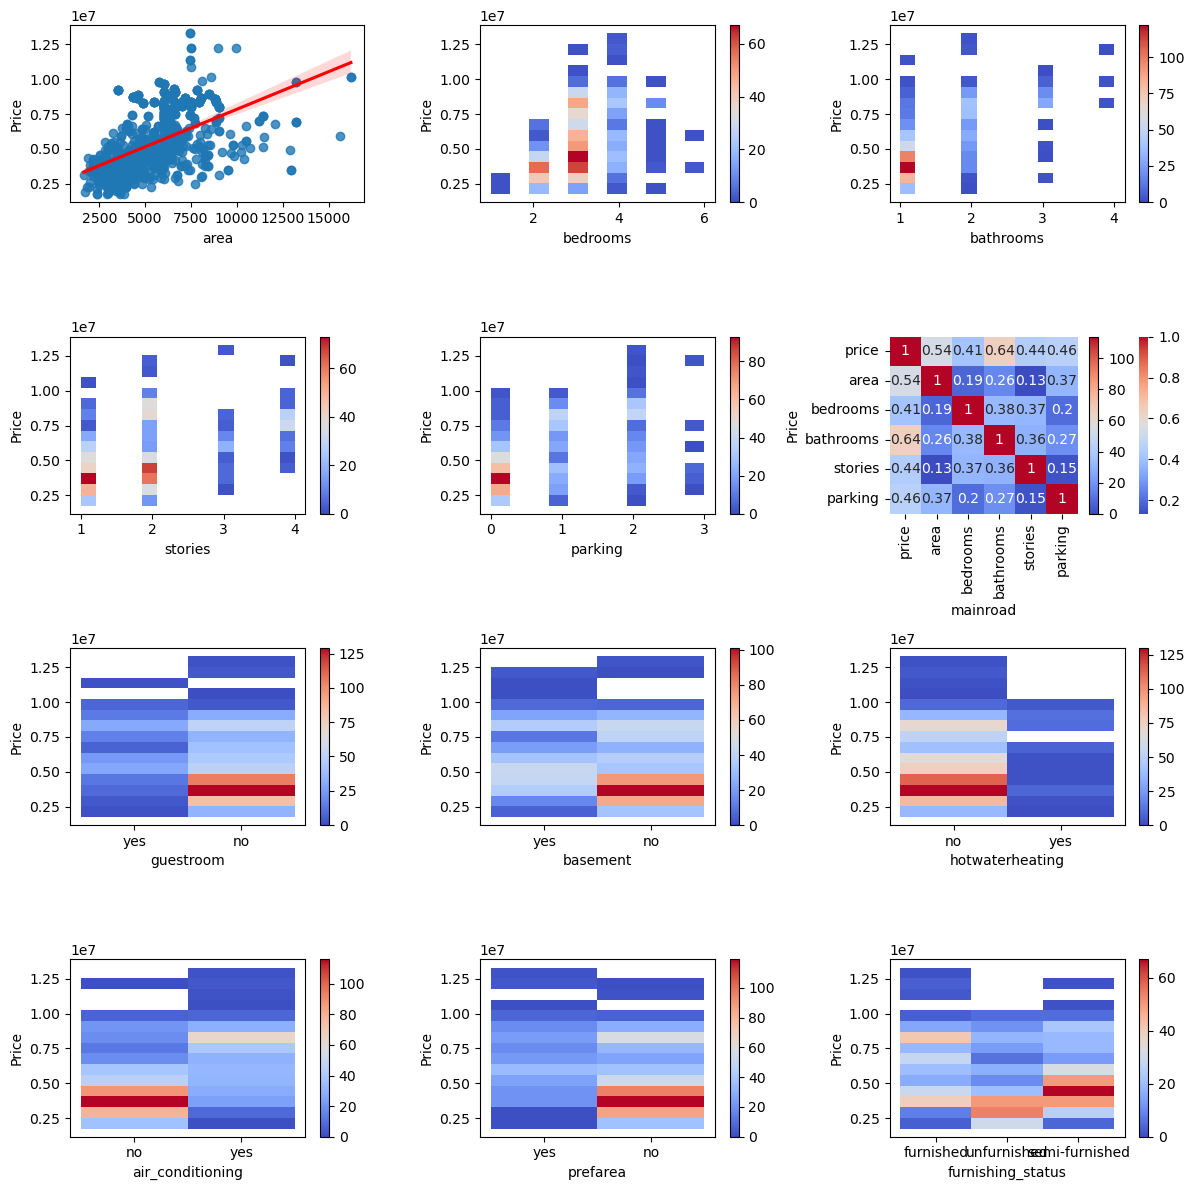

In [14]:
etude_multivarie(df)

## Valeur manquante

In [15]:
def valeur_manquante(data):
    # Séparer les variables quantitatives des variables qualitatives
    quantitative_columns = data.select_dtypes(include=['int', 'float']).columns
    qualitative_columns = data.select_dtypes(include=['object']).columns

    # Calculer la moyenne de chaque variable quantitative
    medians = data[quantitative_columns].median()

    modes = data[qualitative_columns].mode().iloc[0]

    # Remplacer les valeurs manquantes dans les variables quantitatives par leur moyenne respective
    data[quantitative_columns] = data[quantitative_columns].fillna(medians)

    # Remplacer les valeurs manquantes dans les variables qualitatives par le mode respectif
    data[qualitative_columns] = data[qualitative_columns].fillna(modes)
    return data

In [16]:
df = valeur_manquante(df)

In [17]:
df.isnull().sum()

price                0
area                 0
bedrooms             0
bathrooms            0
stories              0
mainroad             0
guestroom            0
basement             0
hotwaterheating      0
air_conditioning     0
parking              0
prefarea             0
furnishing_status    0
dtype: int64

### 1.4 Typage des variables

In [18]:
def typage_variable(data):
    """
    Description:
    We change the values 'yes, no' to '1,0' repsectively
    On code les variables qualitatives
    On change les valeurs True et False dans notre data à 1 et 0 respectivement
    On remplace 'semi-furnished' par 'semi_furnished'
  
    Args
    ----------
    data: pandas.DataFrame.
  
    Returns
    ----------
    df : pandas.DataFrame.
    """
    # On cree un variable qui contient le nom des colonnes de type object
    object_columns = data.select_dtypes(include=['object']).columns
    
    # On change les valeurs 'yes' et 'no' dans notre data à 1 et 0 respectivement,
    for col in object_columns:
        data[col] = data[col].replace({'yes' : 1, 'no' : 0, 'semi-furnished' : 'semi_furnished' })
    
    # On fait one hot encoding 
    one_hot = data.select_dtypes(include=['object']).columns
    data = pd.get_dummies(data, columns=one_hot)
    boolean_columns = data.select_dtypes(include=['bool']).columns
    data[boolean_columns] = data[boolean_columns].astype(int)
    return data

In [19]:
df = typage_variable(df)

In [20]:
display(df)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,air_conditioning,parking,prefarea,furnishing_status_furnished,furnishing_status_semi_furnished,furnishing_status_unfurnished
0,4543000.0,4990.0,4.0,2.0,2.0,1,1,1,0,0,0.0,1,1,0,0
1,8080940.0,7000.0,3.0,2.0,4.0,1,0,0,0,1,2.0,0,1,0,0
2,8750000.0,4321.0,3.0,2.0,2.0,1,0,1,1,0,2.0,0,1,0,0
3,1890000.0,1700.0,3.0,1.0,2.0,1,0,0,0,0,0.0,0,0,0,1
4,12215000.0,7500.0,4.0,2.0,2.0,1,0,1,0,1,3.0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
804,2653000.0,4000.0,3.0,1.0,2.0,1,0,0,0,1,0.0,0,0,0,1
805,8855000.0,6421.0,3.0,3.0,2.0,1,0,0,0,1,1.0,1,0,1,0
806,3010000.0,3750.0,3.0,1.0,2.0,1,0,0,0,0,0.0,0,0,0,1
807,4340000.0,1905.0,5.0,1.0,2.0,0,0,1,0,0,0.0,0,0,1,0


# 2 Validation croisée

# 3 Machine learning

## 3.1 Baseline

## 3.2 Modèle de régression linéaire

## 3.3 Ensemble Model

In [21]:
# Splitting the data into training and testing sets

# We begin by importing the split_data function that we defined.
from src.data_science.data import split_data

# We take 80% as train and 20% as test with a random seed of 7.
X_train, y_train, X_test, y_test = split_data(df, 0.2, 7)

# We convert the DataFrames y_train and y_test to NumPy arrays.
y_train = y_train.to_numpy()
y_test = y_test.to_numpy()

### Random Forest

### Gradient Boosting
In this part we use Gradient boosting model, which consists of training multiple decision trees $m_1, m_2, \cdots, m_k$, which we call weak learner, then we train them sequentialy, in a way that each weak learner $m_{i+1}$ corrects the errors of $m_i$.

In [46]:
# We start by uploading the Gradient Boosting Regressor from sckitlearn.
from sklearn.ensemble import GradientBoostingRegressor

# n_esmitators is the number of week learner we are considering, and max_depth parameter represent the depth of each tree m_i.
gra_boost_model = GradientBoostingRegressor(n_estimators= 100, max_depth=3)

# We train the model
gra_boost_model.fit(X_train,y_train.ravel())

# We print the score of the model on train and test set
print(f' The score on the train set is {gra_boost_model.score(X_train,y_train)}, and the score in test set is {gra_boost_model.score(X_test,y_test)}')


 The score on the train set is 0.8969644401699818, and the score in test set is 0.7679536970627091


 #### Determining the best number of estimators
 In this part we see the performance of the model when we change the number of the trees we are using (n_estimators).

In [36]:
# We import the mean absolute error from sklearn.
from sklearn.metrics import mean_absolute_error

# We create two empty lists: one for the scores on the training set and one for the scores on the test set.
score_train, score_test = [], []

for i in range(1, 150):
    gra_boost_model = GradientBoostingRegressor(n_estimators=i).fit(X_train, y_train.ravel())
    score_train.append(mean_absolute_error(y_train, gra_boost_model.predict(X_train)))
    score_test.append(mean_absolute_error(y_test, gra_boost_model.predict(X_test)))

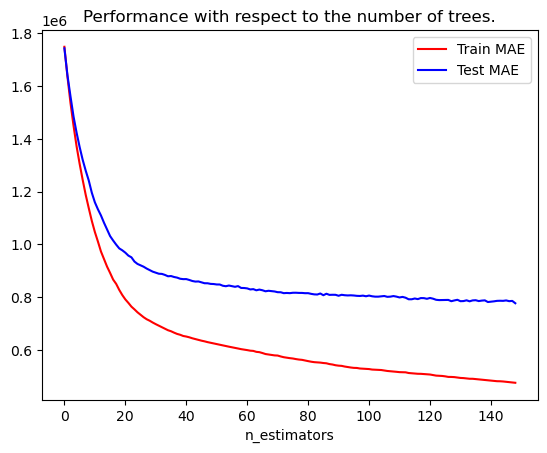

In [48]:
# Plot the training and test scores
plt.plot(score_train, color='red', label='Train MAE')
plt.plot(score_test, color='blue', label='Test MAE')

# Label the axes and set the title
plt.xlabel('n_estimators')
plt.ylabel('')
plt.title('Performance with respect to the number of trees.')

# Display the legend and the plot
plt.legend()
plt.show()

We notice that the model improves when we increase the number of estimators.

### Determining the best depth of the trees.

In [40]:
# We do the some for the depth of the tree, and fix the n_estimators to 100.
score_train_d ,score_test_d = [], []

for i in range(1,16):
    gra_boost_model = GradientBoostingRegressor(n_estimators= 100, max_depth= i).fit(X_train,y_train.ravel())
    score_train_d.append(mean_absolute_error(y_train, gra_boost_model.predict(X_train)))
    score_test_d.append(mean_absolute_error(y_test, gra_boost_model.predict(X_test)))

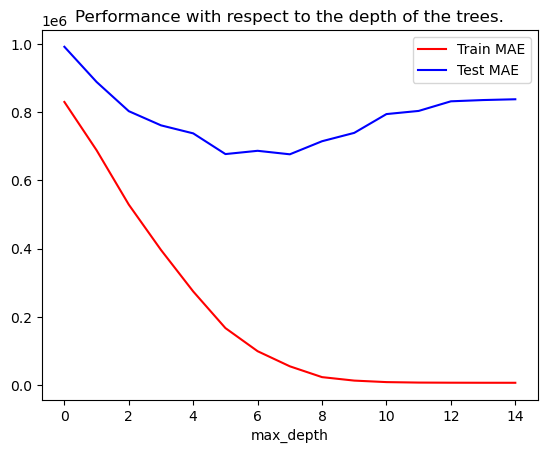

In [47]:
# Plot the training and test scores
plt.plot(score_train_d, c='r', label='Train MAE')   
plt.plot(score_test_d,c='blue', label = 'Test MAE')

# Label the axes and set the title
plt.xlabel('max_depth')
plt.ylabel('')
plt.title('Performance with respect to the depth of the trees.')

# Display the legend and the plot
plt.legend()
plt.show()

We notice that if we use depth bigger than 7, the model will overfit.

## 3.4 Features importances

# 4 Bonus

#### GridSearchCV for the Gradient Boosting model.
We describe briefly what is GridSearchCV. It is an algorithm that search for the best parameters of a certain model. First we provide the parameters (a dictionnary) we want to test, and the number of cross validations denoted by cv (an integer). It starts by deviding the training set $X_{train}$ into k equal subsets $P_1,\cdots,P_k$, then it fits the model on $\bigcup\limits_{i\neq i_0}P_i$, and gets the score on $P_{i_0}$, for $i_0=1,\cdots,k$.  

In [50]:
# We begin by importing the GridSearchCV
from sklearn.model_selection import GridSearchCV

# We choose the model we want to determine it best parameters.
gra_boost_model = GradientBoostingRegressor()

# We specify the parameters that we want GridSearchCV to use when tuning the model.
parameters = {
    'n_estimators':[i for i in range(1,100)], 
    'max_depth':[i for i in range(1,5)]
}

# Create a GridSearchCV object to search for the best hyperparameters
clf = GridSearchCV(gra_boost_model, parameters, cv=5)

# Fit the model to the training data
clf.fit(X_train, y_train.ravel())

GridSearchCV(cv=5, estimator=GradientBoostingRegressor(),
             param_grid={'max_depth': [1, 2, 3, 4],
                         'n_estimators': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                          13, 14, 15, 16, 17, 18, 19, 20, 21,
                                          22, 23, 24, 25, 26, 27, 28, 29, 30, ...]})

In [51]:
# to get the best parameters we use the following method
clf.best_params_

{'max_depth': 4, 'n_estimators': 75}

#### RandomizedSearchCV for the Gradient Boosting model
RandomizedSearchCV is a method for finding the best hyperparameters for machine learning models by randomly sampling parameter combinations. It's efficient for large search spaces and allows you to control the number of iterations for the search.

In [55]:
# We begin by importing the RandomizedSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import GradientBoostingRegressor

# We choose the model we want to determine its best parameters.
gra_boost_model = GradientBoostingRegressor()

# We specify the parameters and their distributions for RandomizedSearchCV.
param_dist = {
    'n_estimators': [i for i in range(1, 150)],
    'max_depth': [i for i in range(1, 10)]
}

# Create a RandomizedSearchCV object to search for the best hyperparameters.
clf_random = RandomizedSearchCV(gra_boost_model, param_distributions=param_dist, n_iter=100, cv=5)

# Fit the model to the training data.
clf_random.fit(X_train, y_train.ravel())


RandomizedSearchCV(cv=5, estimator=GradientBoostingRegressor(), n_iter=100,
                   param_distributions={'max_depth': [1, 2, 3, 4, 5, 6, 7, 8,
                                                      9],
                                        'n_estimators': [1, 2, 3, 4, 5, 6, 7, 8,
                                                         9, 10, 11, 12, 13, 14,
                                                         15, 16, 17, 18, 19, 20,
                                                         21, 22, 23, 24, 25, 26,
                                                         27, 28, 29, 30, ...]})

In [56]:
clf_random.best_params_

{'n_estimators': 108, 'max_depth': 4}